## Second order systems

Consider the second order differential equation
$$ \ddot{y}(t) = \alpha y(t) + \beta \dot{y}(t) $$
with the initial values
$$ y(0) = y_{01} \quad \text{and} \quad \dot{y}(0) = y_{02} \text{.} $$

### Undamped oscillation

If $ \beta = 0 $, then one holds
$$ \ddot{y}(t) = \alpha y(t) $$
which can be solved with 
$$ y(t) = A ~ \sin(\omega t) + B ~ \cos(\omega t) $$
and it follows  $ \alpha = \omega^2 $.

The constants $A$ and $B$ are specified by 
$$ y(0) = B = y_{01} \quad \text{and} \quad \dot{y}(0) = A \omega =  y_{02} $$
and thus $ A = \frac{y_{02}}{\omega} = \frac{y_{02}}{\sqrt{\alpha}} $.

#### Numerical solution
The initial values and the constant $\alpha$ are defined as

In [1]:
y01 = 2.; # Initial values
y02 = 1.2;
α = 3.1; # Parameter

Thus, the solution is given as

In [2]:
ω = sqrt(α); # Natural frequency or Eigenfrequency
A = y02/ω;
B = y01;
t = 0.0 : 0.1 : 5.0; # Time range
y = A * sin.(ω*t) + B * cos.(ω*t); # Analytical solution

The solution is plotted as graph.

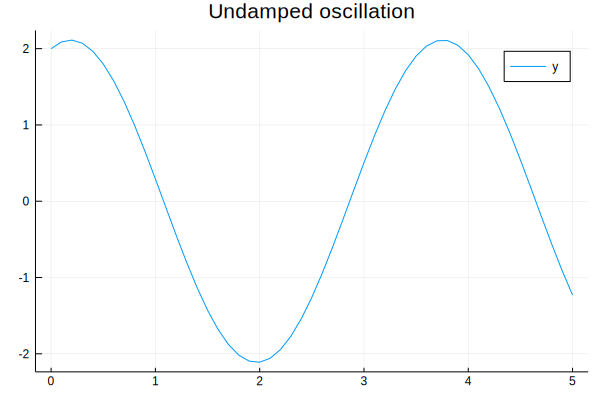

In [3]:
using Plots;
plot(t, y, label="y", title="Undamped oscillation")

### Damped oscillation

If $ \beta \neq 0 $, then the second order system is transformed via
$$ x_{1}(t) = y(t) \\
   x_{2}(t) = \dot{y}(t)
$$
to the first order ODE
$$
\begin{pmatrix}
\dot{x}_{1}(t) \\
\dot{x}_{2}(t)
\end{pmatrix}
= 
\begin{pmatrix}
0 & 1 \\
\alpha & \beta
\end{pmatrix}
\begin{pmatrix}
{x}_{1}(t) \\
{x}_{2}(t)
\end{pmatrix}
= A ~ x(t) \text{.}
$$

#### Stability

The first order system is stable if all eigenvalues of matrix $A$ are smaller than zero. This is proved by
$$ \det(\lambda I - A) = \det
\begin{pmatrix}
\lambda & -1 \\
-\alpha & \lambda - \beta
\end{pmatrix}
= \lambda ~ (\lambda - \beta) - \alpha = \lambda^2 - \beta~\lambda  - \alpha = 0
$$
and further
$$ \lambda_{1,2} = \frac{\beta}{2} \pm \frac{1}{2} \sqrt{\beta^2 + 4 \alpha} \text{.} $$ 

The eigenvalues $\lambda_{1,2}$ are smaller than zero if $ \beta < 0 $ and $ \sqrt{\beta^2 + 4 \alpha} < \beta $  and thus $ \alpha < 0 $.

#### Solution

The solution of the first order system is calculated with the eigenvectors $v_{1}$, $v_{2}$ and constants $C_{1}$, $C_{2}$ as

$$
x(t) = C_{1} ~ v_{1} ~ \exp(\lambda_{1} ~ t) + C_{2} ~ v_{2} ~ \exp(\lambda_{2} ~ t) \text{.}
$$

The eigenvectors $v_{1}$, $v_{2}$ are calculated with the eigenvalues as 
$ (\lambda_{1} I - A) v_{1} = 0 $ and $ (\lambda_{2} I - A) v_{2} = 0 $.

The constants $C_{1}$, $C_{2}$ are calculated via the initial values $ y(0) = x_{1}(0) = y_{01}$ and $ \dot{y}(0) = x_{2}(0) = y_{02}$ as

$$
\begin{pmatrix}
\dot{x}_{1}(0) \\
\dot{x}_{2}(0)
\end{pmatrix}
=
\begin{pmatrix}
y_{01} \\
y_{02}
\end{pmatrix}
= 
[v_{1}, v_{2}]
\begin{pmatrix}
C_{1} \\
C_{2}
\end{pmatrix}
\quad \text{and thus} \quad
\begin{pmatrix}
C_{1} \\
C_{2}
\end{pmatrix}
= 
[v_{1}, v_{2}]^{-1}
\begin{pmatrix}
y_{01} \\
y_{02}
\end{pmatrix} \text{.}
$$

#### Numerical solution

The initial values $y_{01}$, $y_{02}$ and the constants $\alpha$, $\beta$ are given as

In [4]:
y01 = 2.0; # Initial values
y02 = 1.2;
α = -0.25; # Parameters
β = -2.0;

The eigenvalues and eigenvectors of matrix $A$ are calculated as 

In [5]:
using LinearAlgebra
A = [0 1; α β];
eival = eigvals(A); # Eigenvalues of A
eivec = eigvecs(A); # Eigenvectors of A

The constants $C_{1}$, $C_{2}$ are calculated as discussed theoretically and the solution $y(t)$ is calculated and plotted.

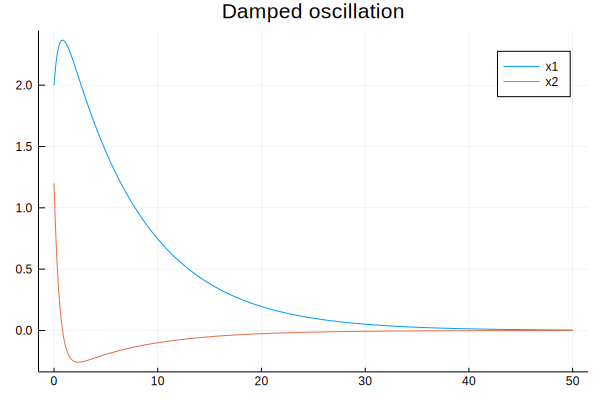

In [6]:
C = inv(eivec)*[y01, y02];
t = 0.0 : 0.1 : 50.0; # Time range
y = eivec * [C[1]*exp.(eival[1]*t),C[2]*exp.(eival[2]*t)]; # Analytical solution
plot(t, y, label=["x1" "x2"], title="Damped oscillation")